In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('C:\\Users\\stolb\\Desktop\\Материалы к лекциям\\Статистика в Python\\Лекция 4\\water.csv')

In [73]:
df = df.drop(columns = 'Unnamed: 0')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

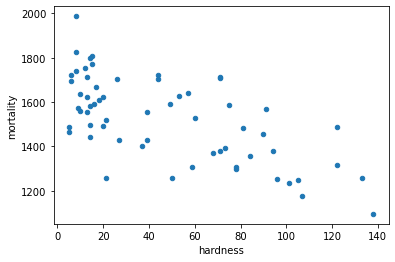

In [45]:
df.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

Выглядит так, будто между показателями жесткости воды и смертности есть средней степени обратная корреляция

In [46]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [47]:
df[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Коэффициенты корреляции подтверждают, что между показателями присутствует связь

In [53]:
X = df[['hardness']]
y = df['mortality']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
model.coef_

array([-3.65672017])

In [65]:
model.intercept_

1688.066270653473

y = -3.66 * x + 1688

In [66]:
y_pred = model.predict(X_test)


In [67]:
model.score(X_test, y_test)

0.30602504827717636

Построенная модель не слишком хорошо описывает данные. Хотелось бы больше данных для обучения, но тогда почти ничего не останется для проверки

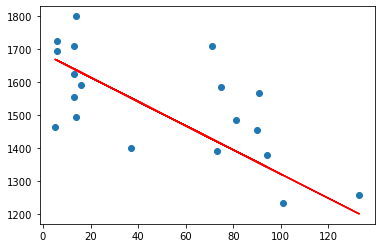

In [68]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c = 'r')

In [39]:
resid = y_test - y_pred
resid

40     29.874050
42     70.471092
2    -203.782670
49    173.187742
51    -83.528908
26    -38.558748
34     57.277512
36     57.874050
41    -82.737534
39     97.038545
24    213.695265
54    -15.528908
46   -141.872188
3     163.127812
27   -150.767624
59     93.128063
21     34.665425
10    -29.125698
53    280.560861
Name: mortality, dtype: float64

Text(0, 0.5, 'факт')

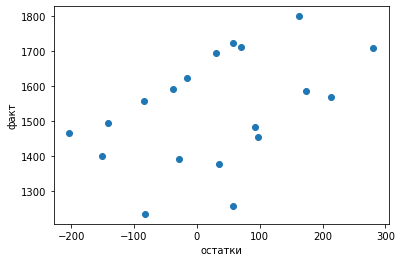

In [50]:
plt.scatter(resid, y_test )
plt.xlabel('остатки')
plt.ylabel('факт')

в остатках наблюдается некоторая системность, значит, модель плохая

In [74]:
df_s = df.loc[df.location == 'South']
df_s

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73
12,South,Cardiff,1519,21
13,South,Coventry,1307,78
14,South,Croydon,1254,96
18,South,East Ham,1318,122
19,South,Exeter,1260,21


In [76]:
df_n = df.loc[df.location == 'North']
df_n

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
8,North,Bradford,1637,10
11,North,Burnley,1755,12
15,North,Darlington,1491,20
16,North,Derby,1555,39
17,North,Doncaster,1428,39


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

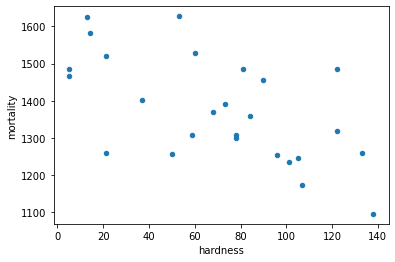

In [75]:
df_s.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

Кажется, что корреляция менее явно выражена, чем в случае по обоим регионам

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

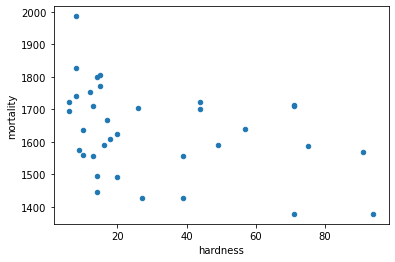

In [77]:
df_n.plot(kind = 'scatter', x = 'hardness', y = 'mortality')

На севере вода менее жесткая, чем на юге, и смертность выше. Возможно, это связано с большим количеством населения и основными источниками водоснабжения (поверхностные воды, скважины, ...)

In [78]:
df_s[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [79]:
df_s[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [80]:
df_n[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [81]:
df_n[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Корреляция для южных районов выше, чем для северных.

По точечным диаграммам видно, что связь между показателями по районам не линейная(для юга чуть получше, для севера - похуже), поэтому считать линейную регрессиюне сильно целесообрано, к тому же данных довольно мало и при каждом новом разбиении на обучающую и тестовую выборки, можно получать очень разные результаты. Но мы все равно попробуем :)

In [95]:
X_s = df_s[['hardness']]
y_s = df_s['mortality']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=123) 
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)
y_pred_s = model_s.predict(X_test_s)
model_s.score(X_test_s, y_test_s)

0.314053204596488

In [96]:
X_n = df_n[['hardness']]
y_n = df_n['mortality']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=321) 
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)
y_pred_n = model_n.predict(X_test_n)
model_n.score(X_test_n, y_test_n)

0.12126929805535858

Для севера коэфф детерминации всегда либо очень маленький, либо вообще отрицательный.

Text(0, 0.5, 'факт')

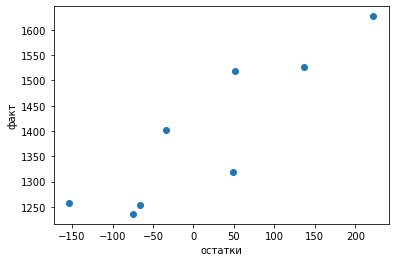

In [97]:
plt.scatter(y_test_s - y_pred_s, y_test_s )
plt.xlabel('остатки')
plt.ylabel('факт')

Text(0, 0.5, 'факт')

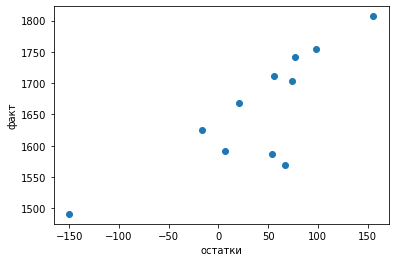

In [98]:
plt.scatter(y_test_n - y_pred_n, y_test_n )
plt.xlabel('остатки')
plt.ylabel('факт')

В общем, всё плохо - никакакой хаотичности, выбросы.
При разделении на регионы, связь между показателями окончательно пропадает.
По результатам можно сделать вывод, что величины жесткости воды и смертности не имеют между собой причинно-следственных связей.